# Session 10: Data Visualization with Matplotlib & Seaborn

**Objective:** Learn to create insightful and professional-looking plots to visualize financial data and analysis results using Matplotlib and Seaborn.

## Introduction

Data visualization is one of the most crucial skills in data analysis. A well-designed chart can reveal trends, patterns, and insights that are impossible to see in a table of numbers. It's the primary way we communicate our findings to others.

- **Matplotlib:** The foundational plotting library in Python. It's extremely powerful and customizable, allowing you to create almost any plot imaginable.
- **Seaborn:** A higher-level library built on top of Matplotlib. It provides a more beautiful default style and simplifies the creation of complex statistical plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Set a professional style for our plots
sns.set_style('whitegrid')

# This command ensures plots are displayed directly in the notebook
%matplotlib inline

## 1. Matplotlib: The Plotting Workhorse

Let's start with the basics. The most common plot for financial data is a line plot to show how a value changes over time.

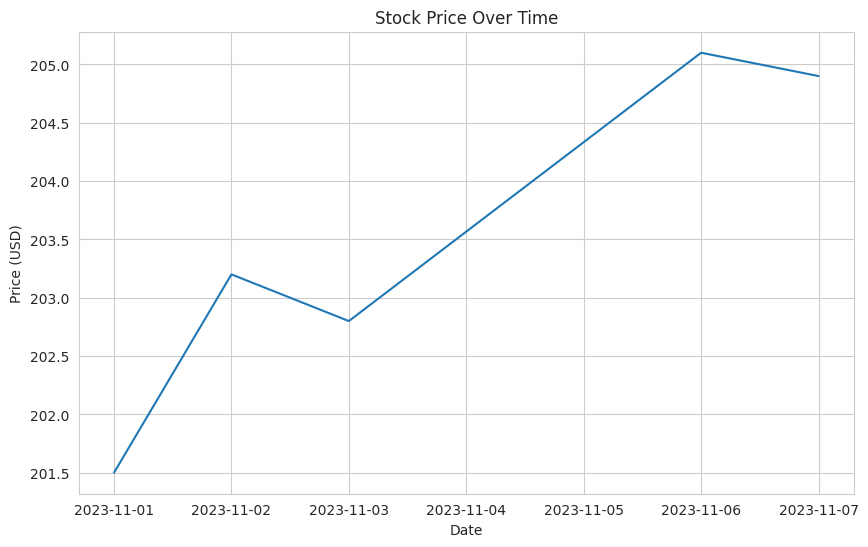

In [2]:
# Sample stock price data
dates = pd.to_datetime(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06', '2023-11-07'])
prices = [201.5, 203.2, 202.8, 205.1, 204.9]

# Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size to be larger
plt.plot(dates, prices)

# Customize the plot with labels and a title
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Display the plot
plt.show()

## 2. Seaborn: Statistical Data Visualization

Seaborn makes it easy to create common statistical plots. A histogram is perfect for understanding the distribution of a dataset, such as daily stock returns.

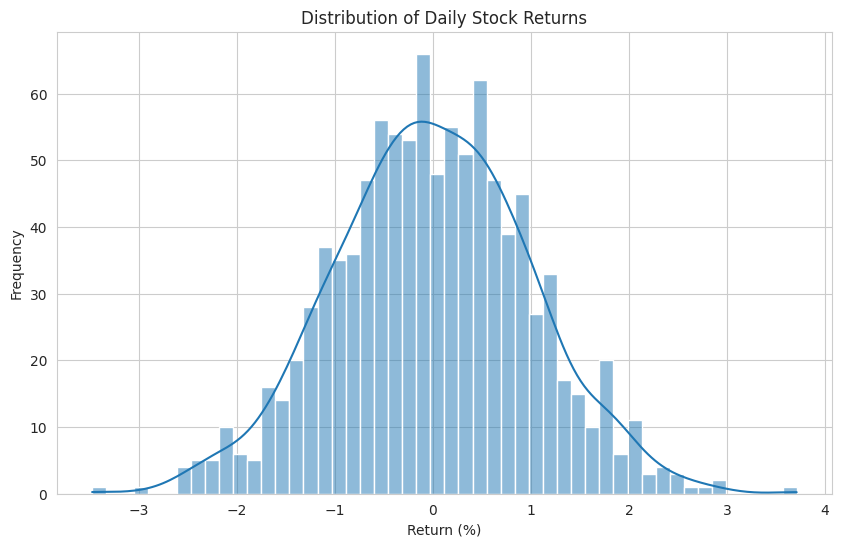

In [3]:
# Generate some sample daily returns (as percentages)
# np.random.normal generates random data with a normal distribution
# (mean=0, std_dev=1)
daily_returns = np.random.normal(0, 1, 1000)

# Create a histogram with a Kernel Density Estimate (KDE) curve
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, bins=50, kde=True)

plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Return (%)')
plt.ylabel('Frequency')
plt.show()

---

## Finance Exercise: Visualizing Stock Performance and Relationships

**Task:** You are given price data for two tech stocks, AAPL and MSFT. Your goal is to create several visualizations to compare their performance and understand their relationship.

In [4]:
# Comprehensive data for the exercise
stock_csv_data = """Date,AAPL_Close,MSFT_Close
2023-10-02,173.5,315.8
2023-10-03,172.4,314.2
2023-10-04,175.0,319.5
2023-10-05,176.8,325.1
2023-10-06,178.2,328.0
2023-10-09,180.1,330.5
2023-10-10,179.8,329.8
2023-10-11,182.3,335.2
2023-10-12,183.1,334.5
2023-10-13,181.5,331.0
"""

# Load data into a DataFrame, ensuring the Date column is parsed correctly
stocks_df = pd.read_csv(StringIO(stock_csv_data), index_col='Date', parse_dates=True)

print("--- Stock Data ---")
print(stocks_df.head())

--- Stock Data ---
            AAPL_Close  MSFT_Close
Date                              
2023-10-02       173.5       315.8
2023-10-03       172.4       314.2
2023-10-04       175.0       319.5
2023-10-05       176.8       325.1
2023-10-06       178.2       328.0


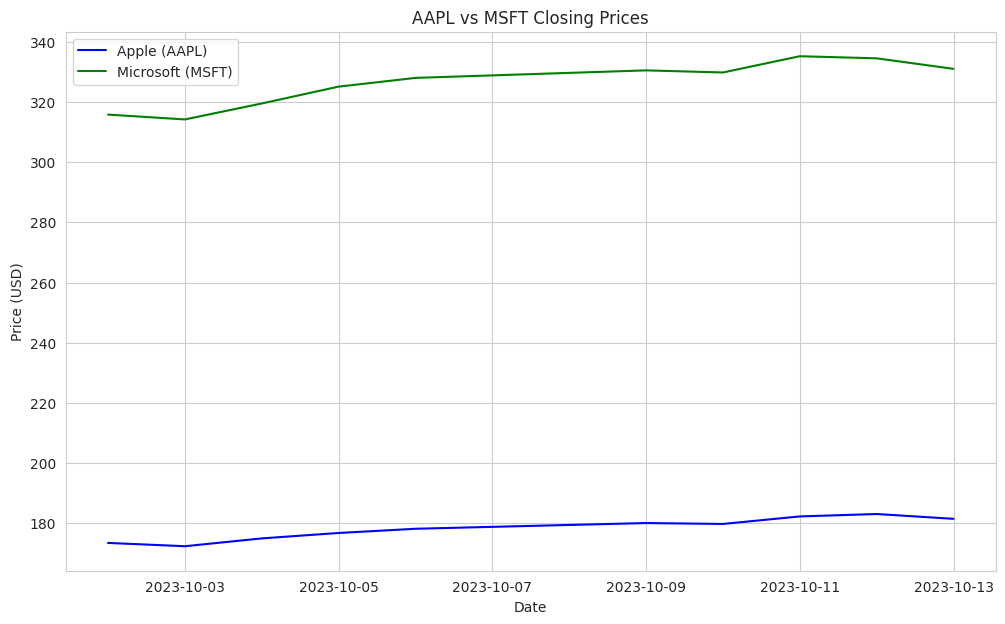

In [5]:
# Step 1: Plot the closing prices of both stocks on the same line chart.

plt.figure(figsize=(12, 7))
plt.plot(stocks_df.index, stocks_df['AAPL_Close'], label='Apple (AAPL)', color='blue')
plt.plot(stocks_df.index, stocks_df['MSFT_Close'], label='Microsoft (MSFT)', color='green')

plt.title('AAPL vs MSFT Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend() # Display the labels for each line
plt.show()

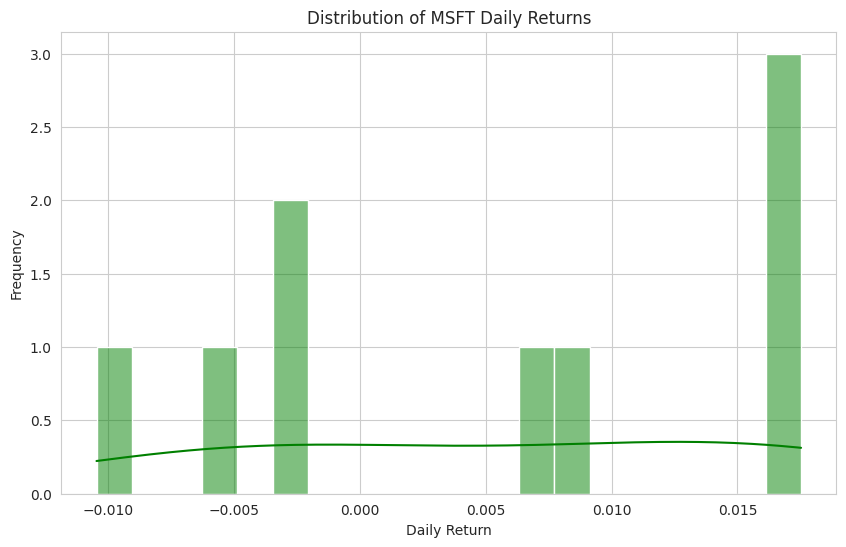

In [6]:
# Step 2: Calculate and visualize the daily returns.
# Daily return = (Today's Price - Yesterday's Price) / Yesterday's Price
stocks_df['AAPL_Return'] = stocks_df['AAPL_Close'].pct_change()
stocks_df['MSFT_Return'] = stocks_df['MSFT_Close'].pct_change()

# Step 3: Create a histogram of MSFT's daily returns to visualize its volatility.
plt.figure(figsize=(10, 6))
# .dropna() is used because the first day will not have a return value (NaN)
sns.histplot(stocks_df['MSFT_Return'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of MSFT Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

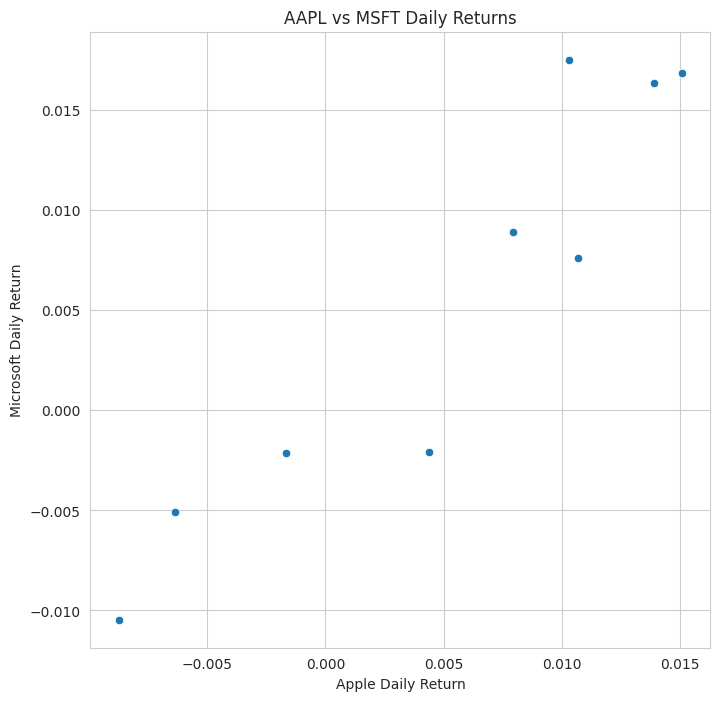

In [7]:
# Step 4: Create a scatter plot to investigate the relationship between the two stocks' returns.
# Do they tend to move together?

plt.figure(figsize=(8, 8))
sns.scatterplot(x='AAPL_Return', y='MSFT_Return', data=stocks_df)
plt.title('AAPL vs MSFT Daily Returns')
plt.xlabel('Apple Daily Return')
plt.ylabel('Microsoft Daily Return')
plt.show()

--- Correlation Matrix ---
             AAPL_Return  MSFT_Return
AAPL_Return     1.000000     0.937512
MSFT_Return     0.937512     1.000000


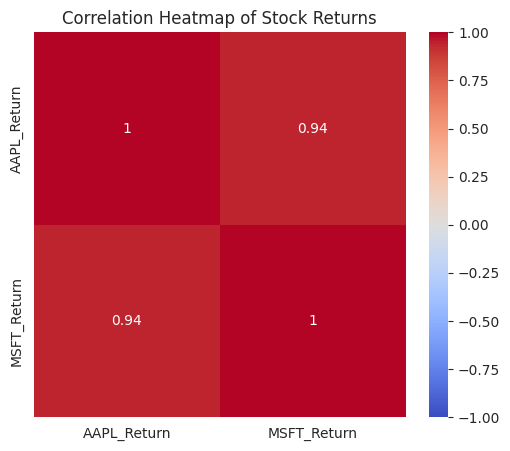

In [8]:
# Step 5: Quantify the relationship using a correlation matrix and visualize it with a heatmap.

# Calculate the correlation matrix
correlation_matrix = stocks_df[['AAPL_Return', 'MSFT_Return']].corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(6, 5))
# annot=True displays the correlation values on the map
# cmap='coolwarm' is a common color map for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stock Returns')
plt.show()